In [27]:
import sys
sys.executable

'/home/ubuntu/anaconda3/envs/shun/bin/python'

In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
from fastai import *
from fastai.text import *

In [30]:
DATA_PATH = Path('../../../data/eminem/')
CSV_PATH = Path('../../../data/eminem/text_eminem.csv')

In [31]:
df = pd.read_csv(CSV_PATH);
df.head()

,text
0,"Eminem] Peace to Thirstin Howl, A.L. and Words..."
1,I reckon you ain't familiar with these here p...
2,Lately I've been hard to reach I've been too ...
3,Eminem Miscellaneous B-Rabbit Vs. Papa Doc (F...
4,Eminem Miscellaneous Eminem Exclusive Freesty...


In [32]:
df['text'][1]

" I reckon you ain't familiar with these here parts You know, there's a story behind that there saloon Twenty years ago, two outlaws took this whole town over Sheriffs couldn't stop 'em, quickest damn gun slinger I've ever seen Got murdered in cold blood, that ol' saloon there was their lil' home Away from home, they say the ghosts of bad and evil still live In that tavern and on a quiet night, you can still hear the footsteps of Slim Shady and Royce Da Five-Nine  I don't speak, I float in the air wrapped in a sheet I'm not a real person, I'm a ghost trapped in a beat I translate when my voice is read through a seismograph And a noise is bred, picked up and transmitted through Royce's head Trapped him in his room, possessed him and hoist his bed Till the evilness flows through his blood like poisonous lead Told him each one of his boys is dead I asked him to come to the dark side, he made a choice and said  Who hard? yo I done heard worse We can get in two cars and accelerate at each o

In [33]:
len(df)

500

In [34]:
bs = 64

In [35]:
data_lm = (TextList.from_df(df, DATA_PATH, col=['text']) 
           .random_split_by_pct(0.1)
           .label_for_lm()
           .databunch(bs=bs))
data_lm.save('tmp_lm')

In [36]:
data_lm = TextLMDataBunch.load(DATA_PATH, 'tmp_lm', bs=bs)

In [37]:
data_lm.show_batch(rows=10)

idx,text
0,"xxbos i take a couple uppers , i down a couple downers xxmaj but nothing compares to these blue and yellow purple pills i 've been to mushroom mountain once or twice but who 's countin ' xxmaj but nothing compares to these blue and yellow purple pills xxmaj cool , calm , just like my mom xxmaj with a couple of valium inside her palm xxmaj it 's xxmaj"
1,"than flippin ' a xxunk xxmaj nose first wit the top off xxunk ' upside - down xxmaj you 're tied down and xxunk - taped , fuck rape i 'd rather just hump a slut 's leg wit my nuts shaved xxmaj and xxmaj sway & & xxmaj tech , two disk xxunk xxmaj breakin ' so many xxunk ' needles i wonder if they xxunk xxmaj xxunk and"
2,"white or purple if you 're xxunk xxmaj but you do n't give a fuck , you were n't doin' shit that you should xxmaj long as you know you 're up to evil xxmaj and you 're no damn good , get on the floor , man , and rep your ' hood xxmaj now honey , do n't let them pricks trip xxmaj we should make a quick"
3,"you , boy , i care about your well being "" xxmaj no xxmaj dad , i said , no , i do n't need no help xxunk ' i 'm a big boy , i can do it by myself , see i only get naked when the babysitter xxunk me xxmaj she showed me a movie like ' xxmaj nightmare on xxmaj elm xxmaj street ' xxmaj but"
4,"grin my teeth and i try to make it work xxmaj with her atleast for xxmaj hailie 's sake i maybe made some mistakes xxmaj but i 'm only human but i 'm man enough to face them today xxmaj what i did was stupid , no doubt it was dumb xxmaj but the smartest shit i did was take the bullets outta that gun xxmaj cause i 'd of"
5,"xxmaj and get a disguise and hide , cause it 'll be my fault xxmaj so do n't do drugs , and do exactly as i do n't , 'cause i 'm bad for you xxmaj repeat xxmaj chorus : ] xxmaj mr. xxmaj xxunk : xxunk xxmaj xxunk ] xxmaj come on children , clap along ( xxmaj shut up ! ) xxmaj sing along children ( xxmaj suck"
6,"'re broke cause you do n't work xxmaj but all bullshit aside , i hit a stride xxmaj still xxmaj shady inside , hair every bit is dyed xxmaj as it used to be when i first xxunk y' all to my xxunk side xxmaj and blamed it on him when they tried to criticize xxmaj cause we are the same , bitch < / p > ] xxbos you"
7,"xxmaj he screams : "" xxmaj bloody xxmaj mary ! "" - xxmaj grabs a mirror xxmaj but stop just ai n't in her vocabular . "" xxmaj get off me , please ! xxmaj get off me , stop ! "" xxmaj ballin ' back at a coffee shop . xxmaj they go non - stop . - xxmaj she says : "" xxmaj go ! "" xxmaj he"
8,"out and what to rap about and i know i got a lot up in my xxunk xxunk that i got ta get out and i 'm not sure how this is gon na come off they 're probably gon na think that i 'm coming off as cocky ( haha ) like i just started giving a fuck what you really think about me see , the thing about"
9,it ) xxmaj so do n't get in the way cuz we gon drop xxrep 4 . ( shit ) xxmaj now how you feel right now we bust yo .. xxunk xxrep 4 . ( tic ) xxrep 4 . ( tock ) xxmaj we xxunk with mics and we do nt stop we come to rock xxmaj the dirty dozen is non - stop .. xxmaj to the


In [41]:
data_lm.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',',
 'i',
 'you',
 'the',
 'and',
 'a',
 'to',
 'it',
 "'s",
 "n't",
 'me',
 'my']

In [42]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.30)

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


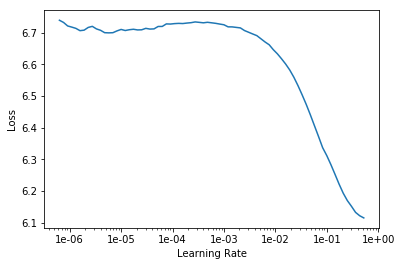

In [44]:
learn.recorder.plot(skip_end=15)

In [45]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,6.146497,5.491667,0.151884
2,4.938815,4.379990,0.214619
3,4.301693,4.044759,0.253189
4,3.951741,3.857626,0.279473
5,3.674254,3.729607,0.299914
6,3.490030,3.641147,0.314020
7,3.347700,3.583113,0.323630
8,3.267161,3.550039,0.330843
9,3.206700,3.536108,0.331538
10,3.178954,3.534756,0.332213


In [46]:
learn.save('eminem_head')

In [47]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.169956,3.525951,0.333797
2,3.194614,3.507550,0.337132
3,3.176832,3.505372,0.338720
4,3.109788,3.467129,0.345227
5,3.048465,3.417713,0.354562
6,2.956025,3.379473,0.362194
7,2.864979,3.349827,0.366267
8,2.809133,3.329731,0.371918
9,2.778981,3.326937,0.371510
10,2.763081,3.323444,0.372089


In [48]:
learn.save('eminem_head_v2')

In [49]:
learn.fit_one_cycle(20, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.748582,3.320891,0.371905
2,2.733740,3.332218,0.371682
3,2.750031,3.310809,0.374401
4,2.800156,3.310986,0.374498
5,2.772753,3.306041,0.375792
6,2.787539,3.305632,0.377312
7,2.740220,3.287737,0.382470
8,2.718042,3.275231,0.385895
9,2.649410,3.255512,0.390825
10,2.640497,3.242722,0.391139


In [50]:
learn.save('eminem_head_v3')

In [51]:
learn.fit_one_cycle(50, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.423590,3.170770,0.409867
2,2.431192,3.172481,0.410916
3,2.416650,3.155406,0.412693
4,2.429976,3.167922,0.409953
5,2.432496,3.159415,0.411783
6,2.414503,3.162792,0.412885
7,2.443074,3.162371,0.411858
8,2.448847,3.162682,0.413206
9,2.445807,3.165472,0.412136
10,2.445442,3.178298,0.410723


In [52]:
learn.save('tweet_head_v4')

In [53]:
learn.load('tweet_head_v4');

In [54]:
learn.unfreeze()

In [55]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.101029,3.043995,0.454047
2,1.979645,2.956891,0.472817
3,1.867224,2.888991,0.486664
4,1.744565,2.885960,0.495227
5,1.688197,2.873586,0.497171


In [56]:
learn.save('eminem_fine_tuned_v1')

In [57]:
learn.load('eminem_fine_tuned_v1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (450 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: ../../../data/eminem
x: LMTextList (450 items)
[Text xxbos xxmaj eminem ] xxmaj peace to xxmaj xxunk xxmaj xxunk , xxup xxunk and xxmaj xxunk xxmaj my mother smoked crack , i had a premature birth i 'm just a xxunk cursed , wit badly xxunk nerves xxmaj who wanna be the one to step up and get served first ? xxmaj ninety - nine percent of aliens prefer earth xxmaj so i 'm here to rule the planet , startin wit your turf i hid a secret message inside of a xxunk xxmaj wit xxunk letters , runnin together in blurred xxunk i hang wit male chauvinist pigs and xxunk xxmaj who point water pistols at women and xxunk shirts xxmaj been a bad boy since diapers and xxmaj xxunk 's xxmaj my first words were " xxmaj bleep bleep " and " xxmaj curse curse " xxmaj never had ish , and i still do n't deserve dirt xxmaj my breath still stinks and i 'm on my third 

In [60]:
TEXT = "You assuming"
N_WORDS = 20
N_SENTENCES = 2

In [61]:
print("\n".join(learn.predict(TEXT, N_WORDS) for _ in range(N_SENTENCES)))

You assuming i would speak sounds like an hop mobile , yo i 'm a beat rap xxmaj it 's pop i
You assuming i would never , turn or break it off , i 'll turn you aim for that fool you see
